In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import pymysql
import pandas as pd
host= os.getenv( 'MYSQL_HOST' )
conn= pymysql.connect(
    host=host,
    port=int (3306),
    user= "root",
    passwd='aryak123',
    db="INSURANCE",
    charset='utf8mb4' )
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
df1=pd.read_sql_query("SELECT d.money_insured as MONEY_INSURED, d.insurance_type AS INSURANCE_TYPE,  a.insurance_id AS INSURANCE_ID, b.status AS STATUS, f.P_Name as PatientName FROM insure a, claim_details b, insurance_type c, health_insurance d, person e, patient_info f WHERE a.claim_id = b.claim_id	AND b.status = 'TRUE'	AND a.insurance_id = c.insurance_id	AND c.insurance_type = d.insurance_type and e.person_insurance_id=c.insurance_id   and e.personID=f.Person_ID",conn)

In [7]:
df1.head()

MONEY_INSURED INSURANCE_TYPE  INSURANCE_ID STATUS            PatientName
0         92254            PPO             6   TRUE              Erina Wye
1         92254            PPO           149   TRUE         Krystyna Quirk
2         74421            POS           141   TRUE  Barbara-anne Parbrook
3         74421            POS           195   TRUE     Chrisy Hessentaler
4         72931            EPO           131   TRUE          Sherman Joint

In [8]:
df1.nunique()

MONEY_INSURED       4
INSURANCE_TYPE      4
INSURANCE_ID      132
STATUS              1
PatientName       132
dtype: int64

In [9]:
df1.describe()

INSURANCE_ID
count    152.000000
mean      95.190789
std       60.819212
min        1.000000
25%       37.750000
50%       92.000000
75%      151.250000
max      198.000000

In [10]:
px.histogram(df1, x="INSURANCE_TYPE",color="INSURANCE_TYPE", barmode='group')

In [11]:
df2=pd.read_sql_query("select * from hospital",conn)

In [12]:
df2.nunique()

hospital_id         61
hospital_name       61
h_address           47
isunderinsurance     2
dtype: int64

In [13]:
df3=pd.read_sql_query("select * from final_information a, patient_info b where a.id_info=b.info_id ",conn)

In [14]:
df3.head()

id_info   zip        city  Person_ID  gender  Person_ID  Info_ID  \
0      156  2131  Roslindale        188    male          1      156   
1      147  2703   Attleboro         60    male          2      147   
2      199  1721     Ashland         41  female          3      199   
3       54  1003     Amherst         31    male          4       54   
4       49  2726    Somerset         11    male          5       49   

                                     Medical_History  \
0  Postprocedural  cardiogenic shock, initial enc...   
1     Puncture wound with foreign body of left elbow   
2  External constriction, right lower leg, subseq...   
3              Vitreous abscess (chronic), right eye   
4           Displ transverse fx shaft of r rad, 7thN   

                            email Date_of_Birth Status          P_Name  
0                esaul0@upenn.edu     1/22/1994   true  Caye Barnsdale  
1              hkynge1@census.gov      7/8/2001   true   Tessi Raywood  
2           gmolineaux2@zdnet.com     11/8/1995  false   Wallie Ezzell  
3  mdalliwater3@deliciousdays.com     2/13/2002   true  Frederic Blake  
4                  smazin4@un.org     3/11/1998   true     Jesse Young

In [15]:
df3.head()

id_info   zip        city  Person_ID  gender  Person_ID  Info_ID  \
0      156  2131  Roslindale        188    male          1      156   
1      147  2703   Attleboro         60    male          2      147   
2      199  1721     Ashland         41  female          3      199   
3       54  1003     Amherst         31    male          4       54   
4       49  2726    Somerset         11    male          5       49   

                                     Medical_History  \
0  Postprocedural  cardiogenic shock, initial enc...   
1     Puncture wound with foreign body of left elbow   
2  External constriction, right lower leg, subseq...   
3              Vitreous abscess (chronic), right eye   
4           Displ transverse fx shaft of r rad, 7thN   

                            email Date_of_Birth Status          P_Name  
0                esaul0@upenn.edu     1/22/1994   true  Caye Barnsdale  
1              hkynge1@census.gov      7/8/2001   true   Tessi Raywood  
2           gmolineaux2@zdnet.com     11/8/1995  false   Wallie Ezzell  
3  mdalliwater3@deliciousdays.com     2/13/2002   true  Frederic Blake  
4                  smazin4@un.org     3/11/1998   true     Jesse Young

In [16]:
df3.nunique()

id_info            184
zip                157
city               148
Person_ID          173
gender               2
Person_ID          200
Info_ID            184
Medical_History    199
email              200
Date_of_Birth      197
Status               2
P_Name             188
dtype: int64

In [17]:
df3['gender'].value_counts()

male      134
female     66
Name: gender, dtype: int64

In [18]:
# This function converts given date to age
from datetime import datetime, date
def age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
df3['Age'] = df3['Date_of_Birth'].apply(age)

In [19]:
df3.head()

id_info   zip        city  Person_ID  gender  Person_ID  Info_ID  \
0      156  2131  Roslindale        188    male          1      156   
1      147  2703   Attleboro         60    male          2      147   
2      199  1721     Ashland         41  female          3      199   
3       54  1003     Amherst         31    male          4       54   
4       49  2726    Somerset         11    male          5       49   

                                     Medical_History  \
0  Postprocedural  cardiogenic shock, initial enc...   
1     Puncture wound with foreign body of left elbow   
2  External constriction, right lower leg, subseq...   
3              Vitreous abscess (chronic), right eye   
4           Displ transverse fx shaft of r rad, 7thN   

                            email Date_of_Birth Status          P_Name  Age  
0                esaul0@upenn.edu     1/22/1994   true  Caye Barnsdale   28  
1              hkynge1@census.gov      7/8/2001   true   Tessi Raywood   21  
2           gmolineaux2@zdnet.com     11/8/1995  false   Wallie Ezzell   27  
3  mdalliwater3@deliciousdays.com     2/13/2002   true  Frederic Blake   20  
4                  smazin4@un.org     3/11/1998   true     Jesse Young   24

In [20]:
px.histogram(df3, x="gender", color="Status", barmode='group', pattern_shape="Status")

In [21]:
fig = px.box(df3, x="Age",points="all", color="Status", notched=True)
fig.show()

In [22]:
df5=pd.read_sql_query("select * from hospital",conn)
df6=pd.read_sql_query("select * from hospital where isunderinsurance='true'",conn)

In [23]:
df5.head()

hospital_id                     hospital_name        h_address  \
0            1              Anna Jaques Hospital  Newburyport, MA   
1            2                    Athol Hospital        Athol, MA   
2            3  Baystate Franklin Medical Center   Greenfield, MA   
3            4           Baystate Medical Center  Springfield, MA   
4            5           Baystate Noble Hospital    Westfield, MA   

  isunderinsurance  
0            FALSE  
1             TRUE  
2             TRUE  
3             TRUE  
4             TRUE

In [24]:
df6.head()

hospital_id                     hospital_name        h_address  \
0            2                    Athol Hospital        Athol, MA   
1            3  Baystate Franklin Medical Center   Greenfield, MA   
2            4           Baystate Medical Center  Springfield, MA   
3            5           Baystate Noble Hospital    Westfield, MA   
4            7          Berkshire Medical Center   Pittsfield, MA   

  isunderinsurance  
0             TRUE  
1             TRUE  
2             TRUE  
3             TRUE  
4             TRUE

In [25]:
a=df5["h_address"].value_counts()
b=df5["h_address"].unique()
fig = px.pie(df5, values=a, names=b)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [26]:
a=df6["h_address"].value_counts()
b=df6["h_address"].unique()
fig = px.pie(df6, values=a, names=b)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [27]:
df2=pd.read_sql_query("SELECT d.money_insured as MONEY_INSURED, d.insurance_type AS INSURANCE_TYPE,  a.insurance_id AS INSURANCE_ID, b.status AS STATUS, f.P_Name as PatientName FROM insure a, claim_details b, insurance_type c, health_insurance d, person e, patient_info f WHERE a.claim_id = b.claim_id	AND b.status = 'TRUE'	AND a.insurance_id = c.insurance_id	AND c.insurance_type = d.insurance_type and e.person_insurance_id=c.insurance_id   and e.personID=f.Person_ID",conn)

In [28]:
df2.head()

MONEY_INSURED INSURANCE_TYPE  INSURANCE_ID STATUS            PatientName
0         92254            PPO             6   TRUE              Erina Wye
1         92254            PPO           149   TRUE         Krystyna Quirk
2         74421            POS           141   TRUE  Barbara-anne Parbrook
3         74421            POS           195   TRUE     Chrisy Hessentaler
4         72931            EPO           131   TRUE          Sherman Joint

In [29]:
df1['INSURANCE_TYPE'].unique()

array(['PPO', 'POS', 'EPO', 'HMO'], dtype=object)

Text(0.5, 1.0, 'Hospitals Count Across Massachussetts')

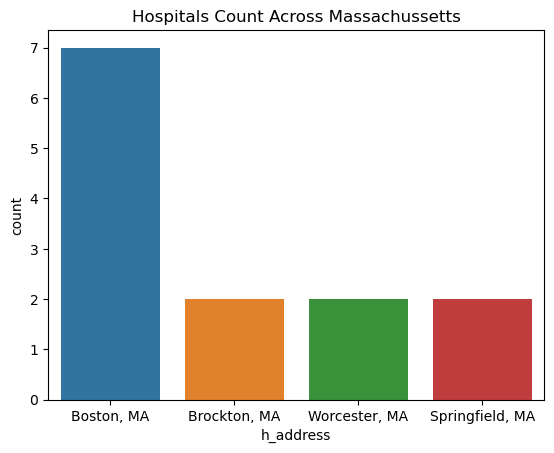

In [30]:
sns.countplot(x='h_address',data=df6,order=pd.value_counts(df6['h_address']).iloc[:4].index)
plt.title('Hospitals Count Across Massachussetts')